<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Ideas" data-toc-modified-id="Ideas-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Ideas</a></span></li><li><span><a href="#import-libraries" data-toc-modified-id="import-libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>import libraries</a></span></li><li><span><a href="#Import-PM2.5-data" data-toc-modified-id="Import-PM2.5-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Import PM<sub>2.5</sub> data</a></span></li><li><span><a href="#SLV-(Single-Level-Diagnosis---MERRA-2)" data-toc-modified-id="SLV-(Single-Level-Diagnosis---MERRA-2)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>SLV (Single Level Diagnosis - MERRA-2)</a></span><ul class="toc-item"><li><span><a href="#reading-netCDF4" data-toc-modified-id="reading-netCDF4-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>reading netCDF4</a></span></li><li><span><a href="#Working-with-wind-data" data-toc-modified-id="Working-with-wind-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Working with wind data</a></span></li><li><span><a href="#Manual-calculate" data-toc-modified-id="Manual-calculate-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Manual calculate</a></span></li><li><span><a href="#Welcome-to-MetPy" data-toc-modified-id="Welcome-to-MetPy-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Welcome to MetPy</a></span></li></ul></li><li><span><a href="#Working-with-all-altitude-winds" data-toc-modified-id="Working-with-all-altitude-winds-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Working with all altitude winds</a></span><ul class="toc-item"><li><span><a href="#Pressure-and-height" data-toc-modified-id="Pressure-and-height-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Pressure and height</a></span></li><li><span><a href="#Convert-wind-(U,V)-to-speed-(m/s)" data-toc-modified-id="Convert-wind-(U,V)-to-speed-(m/s)-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Convert wind (U,V) to speed (m/s)</a></span></li><li><span><a href="#merge-data-of-wind-with-pm25" data-toc-modified-id="merge-data-of-wind-with-pm25-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>merge data of wind with pm25</a></span></li></ul></li><li><span><a href="#Convert-specific-humdity-to-relative-humdity" data-toc-modified-id="Convert-specific-humdity-to-relative-humdity-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Convert specific humdity to relative humdity</a></span><ul class="toc-item"><li><span><a href="#approximation" data-toc-modified-id="approximation-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>approximation</a></span></li><li><span><a href="#Use-MetPy-package" data-toc-modified-id="Use-MetPy-package-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Use MetPy package</a></span></li></ul></li><li><span><a href="#Darksky" data-toc-modified-id="Darksky-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Darksky</a></span><ul class="toc-item"><li><span><a href="#Noibai-data" data-toc-modified-id="Noibai-data-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Noibai data</a></span></li></ul></li><li><span><a href="#explore" data-toc-modified-id="explore-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>explore</a></span></li><li><span><a href="#select-important-columns-to-be-included-in-a-final-df-for-ML" data-toc-modified-id="select-important-columns-to-be-included-in-a-final-df-for-ML-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>select important columns to be included in a final df for ML</a></span></li></ul></div>

# Ideas

- in the previous post (correlation of data in MERRA-2 reanalysis and observed PM<sub>2.5</sub> concentration on the ground), the focus on the a quick correlation on available data in the original format
- wind data, one of the key meteorological paramters influences on the PM<sub>2.5</sub> transport is in U,V vectors (not in speed and angle direction), so that is not very useful to make any correlation. In this exercise, I will calculate wind speed and direction from MERRA-2 format manually, and with a new Python package called `MetPy`
- **MetPy** provides a collection of function to work with atmospheric data
- we will calculate *relative humidity* using `MetPy` and compared with a quick approximation using in the previous post
- the overarching goal is to feather out the important meteorological and atmospheric parameters to predict PM<sub>2.5</sub>. By the end of this exercise, I will bring together three sources of data: 
    - the observed data from NCEI, 
    - the reanalsysis from MERRA-2
    - the forecast data from Darksky

# import libraries

In [1]:
# first let import library, and ignore some of the warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10,6)

# Import PM<sub>2.5</sub> data

In [3]:
# load PM2.5 data and combine 3 operations at once
pm25 = pd.read_csv('data/cleaned_pm25_Hanoi_PM2.5_2018_YTD.csv',
                   parse_dates=['Date (LT)'],
                  index_col=['Date (LT)'])
pm25.head()

,pm25
Date (LT),
2018-01-01 01:00:00,69.2
2018-01-01 02:00:00,75.5
2018-01-01 03:00:00,90.2
2018-01-01 04:00:00,97.6
2018-01-01 05:00:00,89.1


# SLV (Single Level Diagnosis - MERRA-2)

In [4]:
# similar with single level data
df = pd.read_csv('data/merra2_slv_hanoi_2018.csv',
                parse_dates=['time'],
                index_col=['time'])
df.head()

,U2M,V250,TROPT,TROPPB,T2M,TQL,T500,U850,PS,V850,...,H850,T850,U50M,U10M,TROPPV,H500,V500,T2MWET,U500,QV10M
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.023183,10.807207,192.34645,10051.0290,287.10890,0.008423,267.34950,-0.678858,100905.08,6.310610,...,1527.0985,283.53122,0.030755,0.031674,7564.037,5840.2160,-1.304574,284.03730,11.181688,0.007823
2018-01-01 01:00:00,0.189619,11.351880,192.50723,10052.2750,286.79376,0.009235,267.07660,-0.398818,100865.09,6.162886,...,1522.4517,283.64413,0.424628,0.304242,7369.791,5835.2650,-2.038413,283.94345,11.029030,0.007823
2018-01-01 02:00:00,0.243190,11.913273,192.63431,10051.5625,286.48932,0.006260,266.77542,-0.217877,100819.56,5.993750,...,1518.0483,283.75928,0.544786,0.386887,7256.081,5830.6333,-2.332026,283.87656,10.573646,0.007822
2018-01-01 03:00:00,0.195083,12.295908,192.71167,10052.2780,286.24753,0.003489,266.50415,-0.217092,100793.71,5.911840,...,1515.4990,283.86768,0.383533,0.283328,7255.750,5828.6885,-2.251715,283.76090,10.046288,0.007807
2018-01-01 04:00:00,0.132475,12.672207,192.72789,10050.9120,285.96360,0.002314,266.30140,-0.108732,100791.80,5.884082,...,1514.8696,283.87558,0.213028,0.169195,7256.080,5828.3154,-1.790147,283.66614,9.330713,0.007804


In [5]:
df.columns

Index(['U2M', 'V250', 'TROPT', 'TROPPB', 'T2M', 'TQL', 'T500', 'U850', 'PS',
       'V850', 'H250', 'Q250', 'T2MDEW', 'V50M', 'Q500', 'DISPH', 'H1000',
       'TS', 'T10M', 'TROPPT', 'SLP', 'U250', 'Q850', 'ZLCL', 'TQV', 'V2M',
       'T250', 'TROPQ', 'V10M', 'H850', 'T850', 'U50M', 'U10M', 'TROPPV',
       'H500', 'V500', 'T2MWET', 'U500', 'QV10M'],
      dtype='object')

In [6]:
df.describe()

,U2M,V250,TROPT,TROPPB,T2M,TQL,T500,U850,PS,V850,...,H850,T850,U50M,U10M,TROPPV,H500,V500,T2MWET,U500,QV10M
count,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,...,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000
mean,-0.661194,0.911338,192.983228,9874.836900,296.432677,0.080424,268.319280,0.650805,100073.794543,1.204573,...,1498.307756,289.649016,-1.421893,-0.978380,8695.439796,5853.869860,1.205586,293.377792,7.558238,0.015139
std,1.022452,7.235232,2.459432,1055.276131,6.134071,0.083286,2.165962,4.702194,734.635678,4.222000,...,39.089350,4.745890,2.253938,1.502244,1091.511613,26.150734,4.703001,5.855006,8.829429,0.004645
min,-5.820403,-24.197369,184.202580,7255.293000,275.719970,0.000000,258.809420,-22.636606,98338.780000,-17.767721,...,1367.254400,271.759030,-11.224982,-8.524143,6149.086000,5744.518000,-16.558525,271.761080,-22.920101,0.002889
25%,-1.263075,-3.923812,191.382130,8735.479000,292.590985,0.012516,266.953430,-2.512539,99431.925000,-1.230508,...,1470.055150,287.306015,-2.895601,-1.876319,8104.948150,5836.291500,-1.708599,290.466200,1.127894,0.011993
50%,-0.678653,0.018114,192.955900,10051.172000,297.864900,0.055450,268.411380,0.655021,100131.125000,1.752397,...,1504.329500,290.681700,-1.665551,-1.138683,8544.076000,5853.969000,1.083833,295.096560,7.797653,0.016063
75%,-0.086650,5.154851,194.554450,10052.314000,300.669405,0.121292,270.076035,3.664199,100565.390000,3.917061,...,1527.514700,293.126145,-0.180966,-0.146952,9564.690750,5873.187500,4.363369,298.027035,13.789646,0.019173
max,3.647237,28.693241,207.632840,14726.783000,309.323800,0.451294,272.917000,21.900370,102189.990000,14.195785,...,1588.751800,297.514160,7.377525,5.157908,14727.668000,5925.305700,19.502840,301.152130,31.799278,0.022890


## reading netCDF4
- let see the standard name by reading metadata using netCDF

In [7]:
import netCDF4 as nc

In [8]:
ds = nc.Dataset('data/nc4/MERRA2_400.tavg1_2d_slv_Nx.20180722.nc4')

In [9]:
name_ = dict()
for k in ds.variables.keys():
    name_[k] = f'{ds.variables[k].standard_name}, {ds.variables[k].units}'
name_ 

{'U2M': '2-meter_eastward_wind, m s-1',
 'V250': 'northward_wind_at_250_hPa, m s-1',
 'TROPT': 'tropopause_temperature_using_blended_TROPP_estimate, K',
 'TROPPB': 'tropopause_pressure_based_on_blended_estimate, Pa',
 'T2M': '2-meter_air_temperature, K',
 'TQL': 'total_precipitable_liquid_water, kg m-2',
 'T500': 'air_temperature_at_500_hPa, K',
 'U850': 'eastward_wind_at_850_hPa, m s-1',
 'PS': 'surface_pressure, Pa',
 'V850': 'northward_wind_at_850_hPa, m s-1',
 'H250': 'height_at_250_hPa, m',
 'Q250': 'specific_humidity_at_250_hPa, kg kg-1',
 'T2MDEW': 'dew_point_temperature_at_2_m, K',
 'V50M': 'northward_wind_at_50_meters, m s-1',
 'Q500': 'specific_humidity_at_500_hPa, kg kg-1',
 'DISPH': 'zero_plane_displacement_height, m',
 'H1000': 'height_at_1000_mb, m',
 'TS': 'surface_skin_temperature, K',
 'T10M': '10-meter_air_temperature, K',
 'TROPPT': 'tropopause_pressure_based_on_thermal_estimate, Pa',
 'SLP': 'sea_level_pressure, Pa',
 'U250': 'eastward_wind_at_250_hPa, m s-1',
 'Q85

In [10]:
# select data of wind only
wind_cols = list()
for k, v in name_.items():
    if 'wind' in v:
        print(k,v)
        wind_cols.append(k)
wind_cols

U2M 2-meter_eastward_wind, m s-1
V250 northward_wind_at_250_hPa, m s-1
U850 eastward_wind_at_850_hPa, m s-1
V850 northward_wind_at_850_hPa, m s-1
V50M northward_wind_at_50_meters, m s-1
U250 eastward_wind_at_250_hPa, m s-1
V2M 2-meter_northward_wind, m s-1
V10M 10-meter_northward_wind, m s-1
U50M eastward_wind_at_50_meters, m s-1
U10M 10-meter_eastward_wind, m s-1
V500 northward_wind_at_500_hPa, m s-1
U500 eastward_wind_at_500_hPa, m s-1


['U2M',
 'V250',
 'U850',
 'V850',
 'V50M',
 'U250',
 'V2M',
 'V10M',
 'U50M',
 'U10M',
 'V500',
 'U500']

In [11]:
# all columns to wind
# let hold off question about what is this wind data, a short answer is that is winds in different altitudes
df[wind_cols].describe()

,U2M,V250,U850,V850,V50M,U250,V2M,V10M,U50M,U10M,V500,U500
count,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000,8483.000000
mean,-0.661194,0.911338,0.650805,1.204573,0.827948,12.517031,0.278457,0.455033,-1.421893,-0.978380,1.205586,7.558238
std,1.022452,7.235232,4.702194,4.222000,3.357065,16.789135,1.555940,2.270334,2.253938,1.502244,4.703001,8.829429
min,-5.820403,-24.197369,-22.636606,-17.767721,-10.803814,-25.246635,-5.911692,-8.217997,-11.224982,-8.524143,-16.558525,-22.920101
25%,-1.263075,-3.923812,-2.512539,-1.230508,-1.804140,-3.606235,-0.749631,-1.253041,-2.895601,-1.876319,-1.708599,1.127894
50%,-0.678653,0.018114,0.655021,1.752397,1.389059,13.254944,0.520839,0.915810,-1.665551,-1.138683,1.083833,7.797653
75%,-0.086650,5.154851,3.664199,3.917061,3.515750,27.017761,1.236187,2.029492,-0.180966,-0.146952,4.363369,13.789646
max,3.647237,28.693241,21.900370,14.195785,8.654327,54.048200,5.089890,6.895058,7.377525,5.157908,19.502840,31.799278


In [12]:
# let start more, 2M wind with V and U components (wind at 2m from the ground)
dfw = df[['V2M', 'U2M']]
dfw.head()

,V2M,U2M
time,,
2018-01-01 00:00:00,0.507052,0.023183
2018-01-01 01:00:00,0.384886,0.189619
2018-01-01 02:00:00,0.296402,0.243190
2018-01-01 03:00:00,0.277474,0.195083
2018-01-01 04:00:00,0.275675,0.132475


## Working with wind data

- a good place to start with wind data in MERRA-2 is from this [post on MERRA-2 wind](https://disc.gsfc.nasa.gov/information/data-in-action?title=Derive%20Wind%20Speed%20and%20Direction%20With%20MERRA-2%20Wind%20Components)
- in short, instead of giving wind data in speed (m/s) and angle (in degree with zero to 360, or main directiton such as North-East), in which zero degree is northerly wind or the wind blows from north to the south
- report wind data in degree due North is called azimuth degrees or [cardinal directions](https://en.wikipedia.org/wiki/Wind_direction). If you look back at SLV data, in original format, wind data is with U,V components

![wind vector](https://disc.gsfc.nasa.gov/media/image/07af14c37a0a44e482feea5975e1731f/windspeed-diagram.png)

**convertion**

- wind speed is simple from U, V vectors
$$ ws = \sqrt{u^2 + v^2}$$

- angle is more complex:
$$ wd = arctan(v/u)$$ except when v = 0, luckily in numpy package, the `arctan2` will take care of zero values. The output is in radian, not in degree

- and also, if wind data is presented in speed (m/s) and angle (in degree due North), then 
    - U = -ws*sin(direction in radians)
    - and V = -ws.cost(direction in radians)
    - more about equation is in [ucar.edu](https://www.eol.ucar.edu/content/wind-direction-quick-reference)

## Manual calculate

In [13]:
# wind speed is easy
dfw['ws'] = dfw.apply(lambda row: np.sqrt(row['V2M']**2 + row['U2M']**2), axis=1)
dfw.head()

,V2M,U2M,ws
time,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582
2018-01-01 01:00:00,0.384886,0.189619,0.429060
2018-01-01 02:00:00,0.296402,0.243190,0.383400
2018-01-01 03:00:00,0.277474,0.195083,0.339189
2018-01-01 04:00:00,0.275675,0.132475,0.305853


In [14]:
# to convert to direction (in degree), it is more complext
dfw['deg'] = dfw.apply(lambda row: ((180/np.pi)*np.arctan2(row['U2M'], row['V2M']))%360, axis=1)
dfw.head()

,V2M,U2M,ws,deg
time,,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582,2.617815
2018-01-01 01:00:00,0.384886,0.189619,0.429060,26.227729
2018-01-01 02:00:00,0.296402,0.243190,0.383400,39.367919
2018-01-01 03:00:00,0.277474,0.195083,0.339189,35.109724
2018-01-01 04:00:00,0.275675,0.132475,0.305853,25.666509


In [15]:
dfw.describe()

,V2M,U2M,ws,deg
count,8483.000000,8483.000000,8483.000000,8483.000000
mean,0.278457,-0.661194,1.722973,242.907187
std,1.555940,1.022452,1.006058,98.782262
min,-5.911692,-5.820403,0.005149,0.188730
25%,-0.749631,-1.263075,0.947313,190.805811
50%,0.520839,-0.678653,1.476474,272.368924
75%,1.236187,-0.086650,2.316369,325.353762
max,5.089890,3.647237,6.811332,359.985100


In [16]:
# let reverse to to U, V component

In [17]:
dfw['V_re'] = dfw.apply(lambda row: row['ws']*np.cos(np.radians(row['deg'])), axis=1)
dfw.head()

,V2M,U2M,ws,deg,V_re
time,,,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582,2.617815,0.507052
2018-01-01 01:00:00,0.384886,0.189619,0.429060,26.227729,0.384886
2018-01-01 02:00:00,0.296402,0.243190,0.383400,39.367919,0.296402
2018-01-01 03:00:00,0.277474,0.195083,0.339189,35.109724,0.277474
2018-01-01 04:00:00,0.275675,0.132475,0.305853,25.666509,0.275675


In [18]:
dfw['U_re'] = dfw.apply(lambda row: row['ws']*np.sin(np.radians(row['deg'])), axis=1)
dfw.head()

,V2M,U2M,ws,deg,V_re,U_re
time,,,,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582,2.617815,0.507052,0.023183
2018-01-01 01:00:00,0.384886,0.189619,0.429060,26.227729,0.384886,0.189619
2018-01-01 02:00:00,0.296402,0.243190,0.383400,39.367919,0.296402,0.243190
2018-01-01 03:00:00,0.277474,0.195083,0.339189,35.109724,0.277474,0.195083
2018-01-01 04:00:00,0.275675,0.132475,0.305853,25.666509,0.275675,0.132475


- noted that I did put a minus in front of U, V vectors

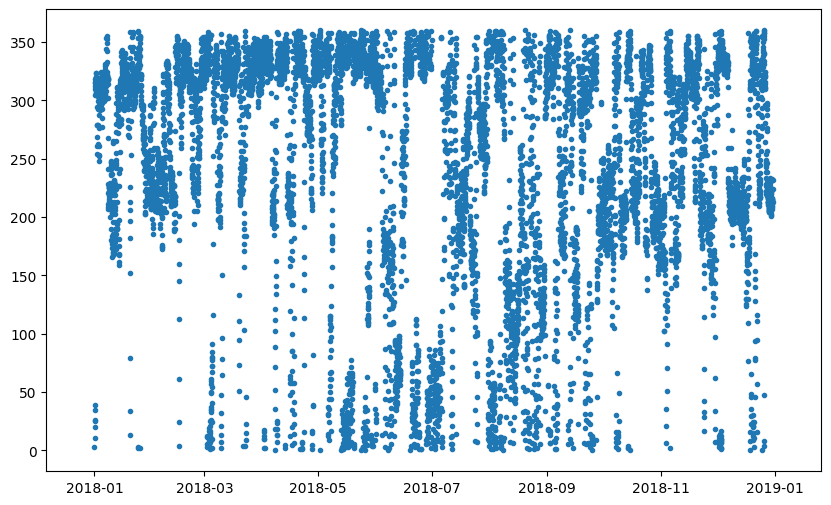

In [19]:
plt.scatter(dfw.index, dfw['deg'], marker='.')

- so we can manually calculate back and foward between vectors (U,V) components and in speed and direction, 
-  do we have a better way to convert using some prepared package, you yes, you bet, there are such package

## Welcome to MetPy
- comprehensive package to work with atmospheric data

In [20]:
# https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.html
try:
    import metpy.calc as mpcalc
except Exception as e:
    print(e)
    !pip install metpy --user

In [21]:
# you could have all conversion function, and many of them are 
# wind speed and component in the end of Dynamic/Kinematic session
# to use the metpy function, you need to attach the units. 
# to do that we will import 
from metpy.units import pandas_dataframe_to_unit_arrays, units

In [22]:
print(len(dir(units)))
# almost one thoudsand types of units

963


In [23]:
wind_cols

['U2M',
 'V250',
 'U850',
 'V850',
 'V50M',
 'U250',
 'V2M',
 'V10M',
 'U50M',
 'U10M',
 'V500',
 'U500']

In [24]:
# make a dictionary to map each parameter with the unit
w_units = dict()
for col in wind_cols:
    w_units[col] = 'meter_per_second'
    
w_units

{'U2M': 'meter_per_second',
 'V250': 'meter_per_second',
 'U850': 'meter_per_second',
 'V850': 'meter_per_second',
 'V50M': 'meter_per_second',
 'U250': 'meter_per_second',
 'V2M': 'meter_per_second',
 'V10M': 'meter_per_second',
 'U50M': 'meter_per_second',
 'U10M': 'meter_per_second',
 'V500': 'meter_per_second',
 'U500': 'meter_per_second'}

In [25]:
select_cols = ['V2M', 'U2M']

In [26]:
df[select_cols].head()

,V2M,U2M
time,,
2018-01-01 00:00:00,0.507052,0.023183
2018-01-01 01:00:00,0.384886,0.189619
2018-01-01 02:00:00,0.296402,0.243190
2018-01-01 03:00:00,0.277474,0.195083
2018-01-01 04:00:00,0.275675,0.132475


In [27]:
# convert a pandas column to an array, this approach is much faster than row-wise with apply() function
wind = pandas_dataframe_to_unit_arrays(df[select_cols], w_units)

In [28]:
wind

{'V2M': array([ 0.507052  ,  0.38488576,  0.29640204, ..., -1.092206  ,
        -1.2885575 , -1.7575915 ]) <Unit('meter_per_second')>,
 'U2M': array([ 0.02318308,  0.1896187 ,  0.24318957, ...,  0.09979065,
        -0.01472685, -0.12540904]) <Unit('meter_per_second')>}

In [29]:
# and to calculate speed and direction, we call them directly from the package
wind['v_2m'] = mpcalc.wind_speed(wind['U2M'], wind['V2M'])
wind['d_2m']  = mpcalc.wind_direction(wind['U2M'], wind['V2M'])

In [30]:
# make a dataframe with shared timestamps as the index
dft = pd.DataFrame({
        'v_2m': wind['v_2m'],
        'd_2m': wind['d_2m']}, index=df.index.to_list(),)
dft.dtypes

v_2m    float64
d_2m    float64
dtype: object

In [31]:
dft.head()

,v_2m,d_2m
2018-01-01 00:00:00,0.507582,182.617815
2018-01-01 01:00:00,0.429060,206.227729
2018-01-01 02:00:00,0.383400,219.367919
2018-01-01 03:00:00,0.339189,215.109724
2018-01-01 04:00:00,0.305853,205.666509


In [32]:
# let merge dataframe with manual calculate and through MetPy package
dfw = pd.merge(dfw, dft, right_index=True, left_index=True)

In [33]:
dfw.index.rename('time', inplace=True)
dfw.head()

,V2M,U2M,ws,deg,V_re,U_re,v_2m,d_2m
time,,,,,,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582,2.617815,0.507052,0.023183,0.507582,182.617815
2018-01-01 01:00:00,0.384886,0.189619,0.429060,26.227729,0.384886,0.189619,0.429060,206.227729
2018-01-01 02:00:00,0.296402,0.243190,0.383400,39.367919,0.296402,0.243190,0.383400,219.367919
2018-01-01 03:00:00,0.277474,0.195083,0.339189,35.109724,0.277474,0.195083,0.339189,215.109724
2018-01-01 04:00:00,0.275675,0.132475,0.305853,25.666509,0.275675,0.132475,0.305853,205.666509


a few interesting point,
- `deg` and `d_2m` seems have some different

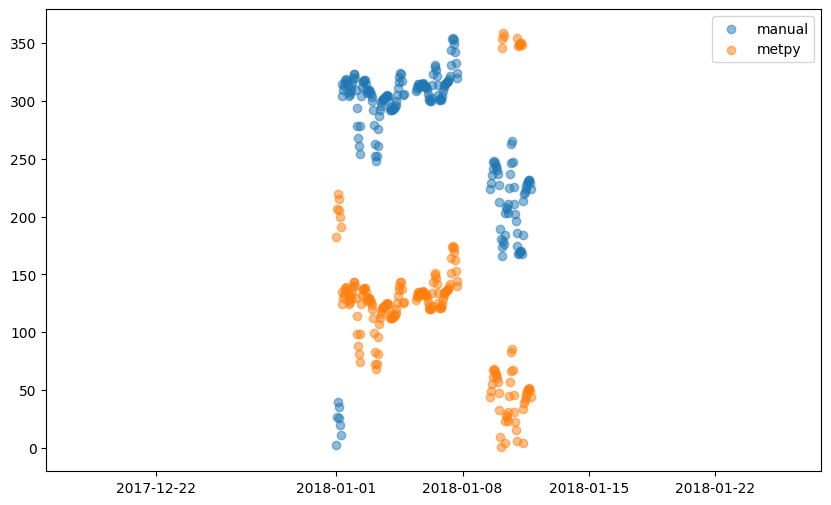

In [34]:
# let visualize data
dft = dfw[0:200]
plt.scatter(dft.index, dft['deg'], label='manual', alpha=0.5)
plt.scatter(dft.index, dft['d_2m'], label='metpy', alpha=0.5)
plt.legend()

- there is something wrong, since the direction in angle is not consistent, in fact they are different with 180 degree

In [35]:
# let redo manual calculation, and add 180 degree to equation:
dfw['deg2'] = dfw.apply(lambda row: ((180/np.pi)*np.arctan2(row['U2M'], row['V2M'])+180)%360, axis=1)
dfw.head()

,V2M,U2M,ws,deg,V_re,U_re,v_2m,d_2m,deg2
time,,,,,,,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582,2.617815,0.507052,0.023183,0.507582,182.617815,182.617815
2018-01-01 01:00:00,0.384886,0.189619,0.429060,26.227729,0.384886,0.189619,0.429060,206.227729,206.227729
2018-01-01 02:00:00,0.296402,0.243190,0.383400,39.367919,0.296402,0.243190,0.383400,219.367919,219.367919
2018-01-01 03:00:00,0.277474,0.195083,0.339189,35.109724,0.277474,0.195083,0.339189,215.109724,215.109724
2018-01-01 04:00:00,0.275675,0.132475,0.305853,25.666509,0.275675,0.132475,0.305853,205.666509,205.666509


- now the degree match, but then the U, V component will be different

In [36]:
dfw['U_re2'] = dfw.apply(lambda row: -row['ws']*np.sin(np.radians(row['deg2'])), axis=1)
dfw['V_re2'] = dfw.apply(lambda row: -row['ws']*np.cos(np.radians(row['deg2'])), axis=1)
dfw.head()

,V2M,U2M,ws,deg,V_re,U_re,v_2m,d_2m,deg2,U_re2,V_re2
time,,,,,,,,,,,
2018-01-01 00:00:00,0.507052,0.023183,0.507582,2.617815,0.507052,0.023183,0.507582,182.617815,182.617815,0.023183,0.507052
2018-01-01 01:00:00,0.384886,0.189619,0.429060,26.227729,0.384886,0.189619,0.429060,206.227729,206.227729,0.189619,0.384886
2018-01-01 02:00:00,0.296402,0.243190,0.383400,39.367919,0.296402,0.243190,0.383400,219.367919,219.367919,0.243190,0.296402
2018-01-01 03:00:00,0.277474,0.195083,0.339189,35.109724,0.277474,0.195083,0.339189,215.109724,215.109724,0.195083,0.277474
2018-01-01 04:00:00,0.275675,0.132475,0.305853,25.666509,0.275675,0.132475,0.305853,205.666509,205.666509,0.132475,0.275675


- that it, we can now properly and manually calculate wind components between U, V components to speed and angle due north

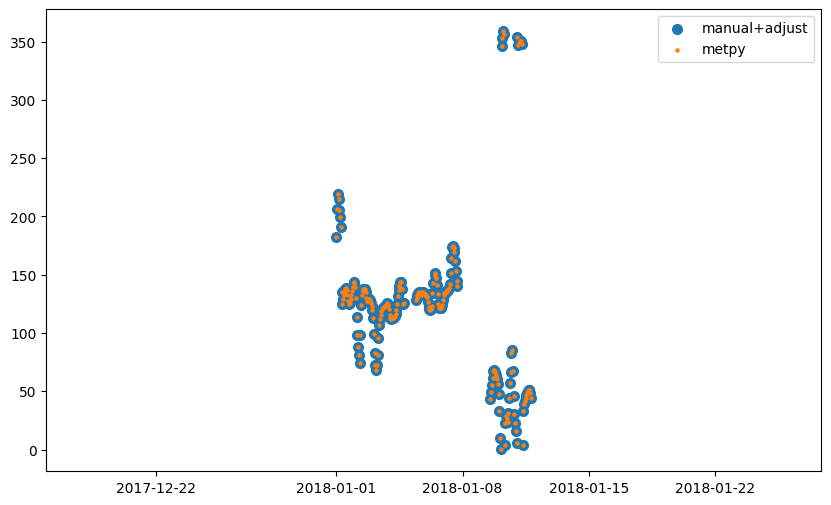

In [37]:
dft = dfw[0:200]
plt.scatter(dft.index, dft['deg2'], label='manual+adjust',  lw=2)
plt.scatter(dft.index, dft['d_2m'], marker='o', s=5, label='metpy')
plt.legend()
# and the degrees should matched (perfectly)

# Working with winds with different altitude


## Pressure and height

- the higher from the ground, the lesser the pressure of air is (and air is thinner)
$$p = p_0 e^{\frac{g}{R \Gamma} \text{ln}(1-\frac{Z \Gamma}{T_0})}$$

In [38]:
# let make a chart for that
height = np.linspace(0, 10000, num=11)* units.m
press = mpcalc.height_to_pressure_std(height)

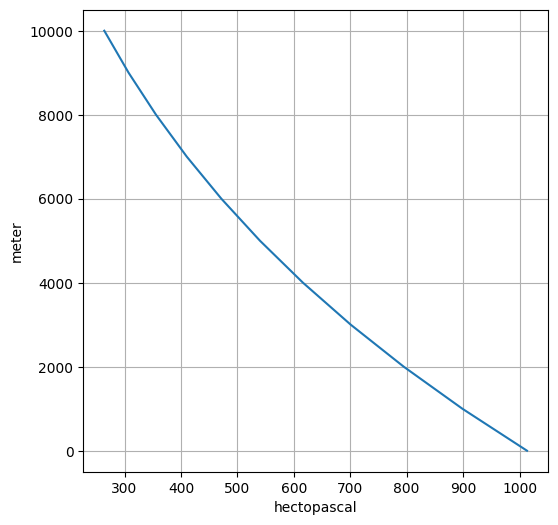

In [39]:
minory = np.linspace(0, 10000, num=101)
minorx = np.linspace(0, 1000, num=101)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(press, height)
ax.grid(which='both')

- so now you can see wind at 250 (hPa) is almost at the top of the troposhere (10km)

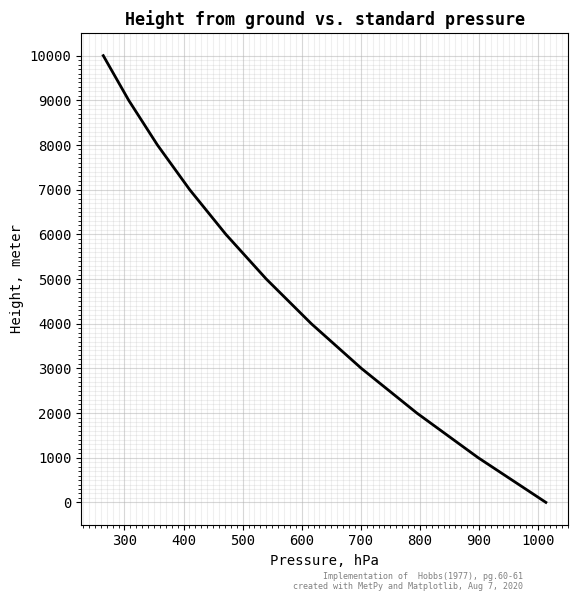

In [40]:
# let make a good graph to display this relationship
plt.rcParams['font.family'] ='monospace'
fig = plt.figure(figsize=(6,6))

ax = fig.add_subplot(1, 1, 1)

x_major_ticks = np.linspace(0, 1100, 12 )
x_minor_ticks = np.linspace(0, 1100, 111)
y_major_ticks = np.linspace(0, 10_000, 11 )
y_minor_ticks = np.linspace(0, 10_000, 101)



ax.set_xticks(x_major_ticks)
ax.set_xticks(x_minor_ticks , minor=True)
ax.set_yticks(y_major_ticks)
ax.set_yticks(y_minor_ticks, minor=True)

ax.grid(which='both')

ax.grid(which='minor', alpha=0.2)
ax.grid(which='major', alpha=0.5)
ax.plot(press, height, color='black', lw=2)
ax.set_ylabel('Height, meter')
ax.set_xlabel('Pressure, hPa')
ax.set_title('Height from ground vs. standard pressure', weight='bold')
fig.text(0.9,0.01, 'Implementation of  Hobbs(1977), pg.60-61\ncreated with MetPy and Matplotlib, Aug 7, 2020', 
         color='gray', fontsize=6, ha='right')
fig.tight_layout(rect=(0.02,0.02, 1, 1))
fig.savefig('img/height.vs.pressure.png', dpi=120, optimize=True)

Resources:  what is the atmosphere level again:
- https://scied.ucar.edu/atmosphere-layers
- https://niwa.co.nz/education-and-training/schools/students/layers
- https://scied.ucar.edu/shortcontent/troposphere-overview

## Convert wind (U,V) to speed (m/s)

In [41]:
# let first convert wind speed and wind direction for all data related to wind MERRA-2
wind = pandas_dataframe_to_unit_arrays(df[wind_cols], w_units)

In [42]:
wind['v_2m'] = mpcalc.wind_speed(wind['U2M'], wind['V2M'])
wind['d_2m']  = mpcalc.wind_direction(wind['U2M'], wind['V2M'])

wind['v_10m'] = mpcalc.wind_speed(wind['U10M'], wind['V10M'])
wind['d_10m']  = mpcalc.wind_direction(wind['U10M'], wind['V10M'])

wind['v_50m'] = mpcalc.wind_speed(wind['U50M'], wind['V50M'])
wind['d_50m']  = mpcalc.wind_direction(wind['U50M'], wind['V50M'])

wind['v_850'] = mpcalc.wind_speed(wind['U850'], wind['V850'])
wind['d_850']  = mpcalc.wind_direction(wind['U850'], wind['V850'])

wind['v_500'] = mpcalc.wind_speed(wind['U500'], wind['V500'])
wind['d_500']  = mpcalc.wind_direction(wind['U500'], wind['V500'])

wind['v_250'] = mpcalc.wind_speed(wind['U250'], wind['V250'])
wind['d_250']  = mpcalc.wind_direction(wind['U250'], wind['V250'])

In [43]:
dft = pd.DataFrame({
        'v_2m': wind['v_2m'],
        'd_2m': wind['d_2m'],
        'v_10m': wind['v_10m'],
        'd_10m': wind['d_10m'],
        'v_50m': wind['v_50m'],
        'd_50m': wind['d_50m'],
        'v_850': wind['v_850'],
        'd_850': wind['d_850'],
        'v_500': wind['v_500'],
        'd_500': wind['d_500'],
        'v_250': wind['v_250'],
        'd_250': wind['d_250'],
        }, index=df.index.to_list(),)
dft.head()

,v_2m,d_2m,v_10m,d_10m,v_50m,d_50m,v_850,d_850,v_500,d_500,v_250,d_250
2018-01-01 00:00:00,0.507582,182.617815,0.820326,182.212835,1.167523,181.509485,6.347019,173.860069,11.257534,276.654649,23.196986,242.232266
2018-01-01 01:00:00,0.429060,206.227729,0.691324,206.109338,0.979452,205.692157,6.175777,176.297386,11.215821,280.471385,23.475563,241.081727
2018-01-01 02:00:00,0.383400,219.367919,0.617108,218.824390,0.872296,218.648565,5.997708,177.918171,10.827758,282.437516,23.842929,240.022727
2018-01-01 03:00:00,0.339189,215.109724,0.525337,212.637784,0.729687,211.709574,5.915825,177.896957,10.295540,282.633150,24.137831,239.375860
2018-01-01 04:00:00,0.305853,205.666509,0.477588,200.748694,0.666341,198.644717,5.885087,178.941354,9.500886,280.860531,24.453376,238.787131


In [44]:
# and save data to work later 
# dft.to_csv('data/merra2_hanoi_2018_wind_converted.csv')

## merge data of wind with pm25

In [45]:
df = pd.merge(dft, pm25, right_index=True, left_index=True)

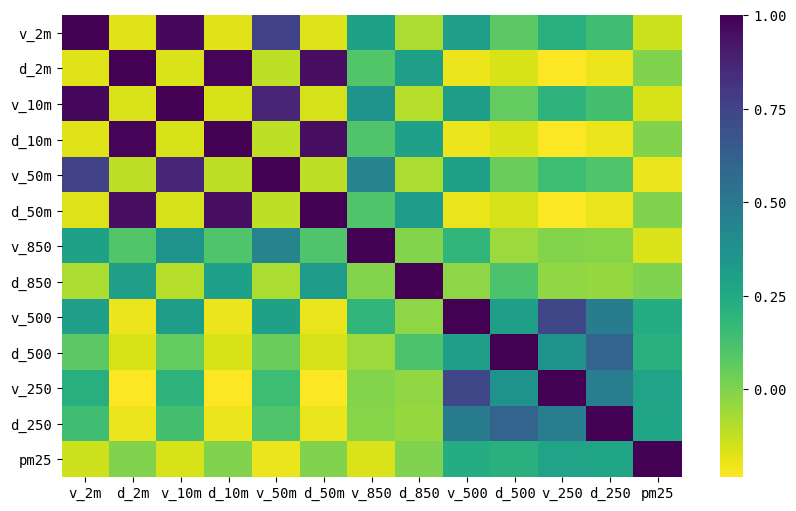

In [46]:
sns.heatmap(df.corr(), cmap='viridis_r')

- pretty colorful, and heatmap was useful to see pattern from a large datashet, 
- in this case, the correlation of winds to PM<sub>2.5</sub> is light green and yellowish - which is weak

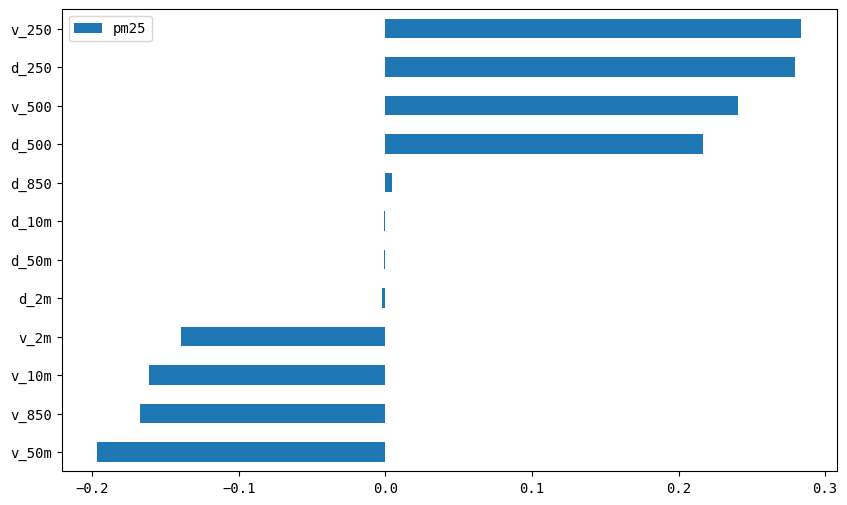

In [47]:
# let try to plot by horizonal bars
df.corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh()

In [48]:
# direction seems important (in agreement with the previous analysis)
# let drill more on speed and direction
# all columns related to speed
vs = [v for v in list(df.columns) if 'v' in v]

In [49]:
# and direction
ds = [v for v in list(df.columns) if 'd' in v]

In [50]:
# and PM2.5 columns
vs.append('pm25')
ds.append('pm25')

In [51]:
# we can also find out what would the height (to the ground) if we know the standard pressure (in hectopascal)
mpcalc.pressure_to_height_std([850, 500, 250]*units.hectopascal)

array([ 1.45656641,  5.57162493, 10.35770597]) <Unit('kilometer')>

In [52]:
# just for proximation
ylabelsz = [50, 1456, 10, 2, 5500, 10000]

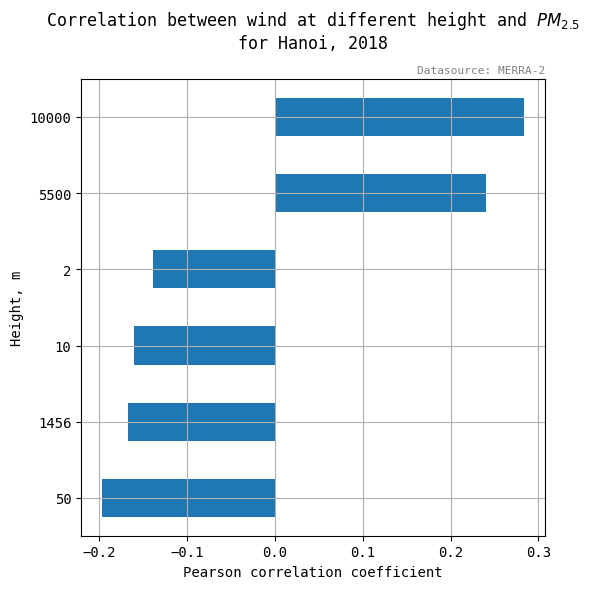

In [53]:
fig, ax = plt.subplots(figsize=(6,6))
df[vs].corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh(ax=ax)
ax.set_yticklabels(ylabelsz)
ax.set_ylabel('Height, m')
ax.set_xlabel('Pearson correlation coefficient')
ax.set_title('Correlation between wind at different height and $PM_{2.5}$\nfor Hanoi, 2018', y=1.05)
ax.text(1.0,1.02, s='Datasource: MERRA-2', va='center', ha='right', transform=ax.transAxes,
       fontsize=8, color='gray')
ax.get_legend().remove()
ax.grid()
fig.tight_layout()
fig.savefig('img/2020Aug_wind_corr_heights.png', optimize=True)


In [54]:
df[vs].corr()['pm25']

v_2m    -0.139372
v_10m   -0.160878
v_50m   -0.196811
v_850   -0.167242
v_500    0.240385
v_250    0.283819
pm25     1.000000
Name: pm25, dtype: float64

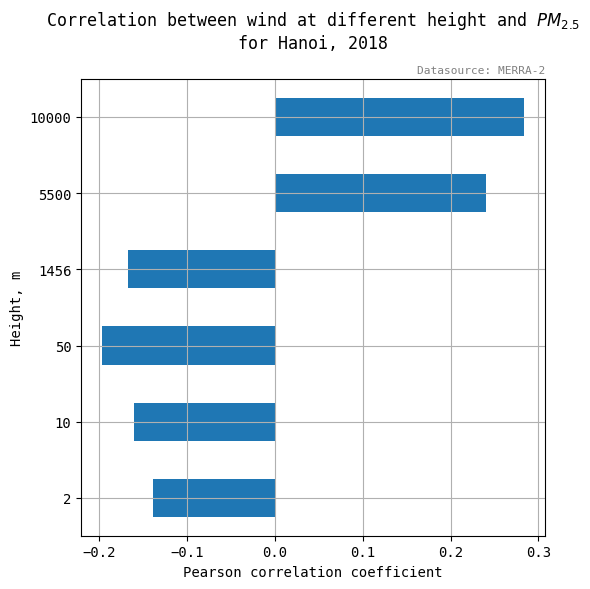

In [55]:
fig, ax = plt.subplots(figsize=(6,6))
df[vs].corr()['pm25'].to_frame().drop('pm25').plot.barh(ax=ax)
ax.set_yticklabels(sorted(ylabelsz))
ax.set_ylabel('Height, m')
ax.set_xlabel('Pearson correlation coefficient')
ax.set_title('Correlation between wind at different height and $PM_{2.5}$\nfor Hanoi, 2018', y=1.05)
ax.text(1.0,1.02, s='Datasource: MERRA-2', va='center', ha='right', transform=ax.transAxes,
       fontsize=8, color='gray')
ax.get_legend().remove()
ax.grid()
fig.tight_layout()
fig.savefig('img/2020Aug_wind_corr_heights_inc.png', optimize=True)


- wind speed near ground (<1000m) is inversely correlated with PM<sub>2.5</sub> concentration,
- wind speed on the top of atmosphere (>5000m) is possively correlated with PM<sub>2.5</sub>

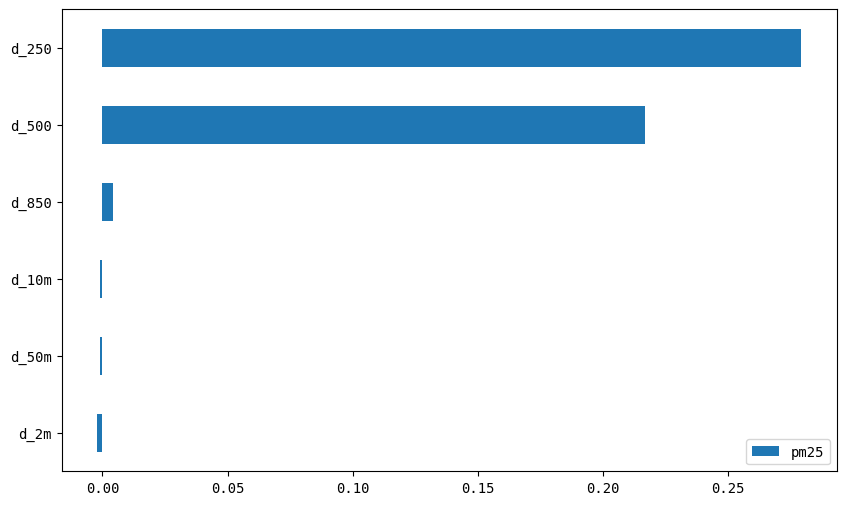

In [56]:
# with direction
df[ds].corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh()

- noted that wind direction is the degree due North, so a large degree (or really close to zero) is the northerly wind (wind blows from the North). We may have look at this in a later time

In [57]:
# filter only wind columns
vs0 = ['v_2m', 'v_10m', 'v_50m', 'v_850', 'v_500', 'v_250']

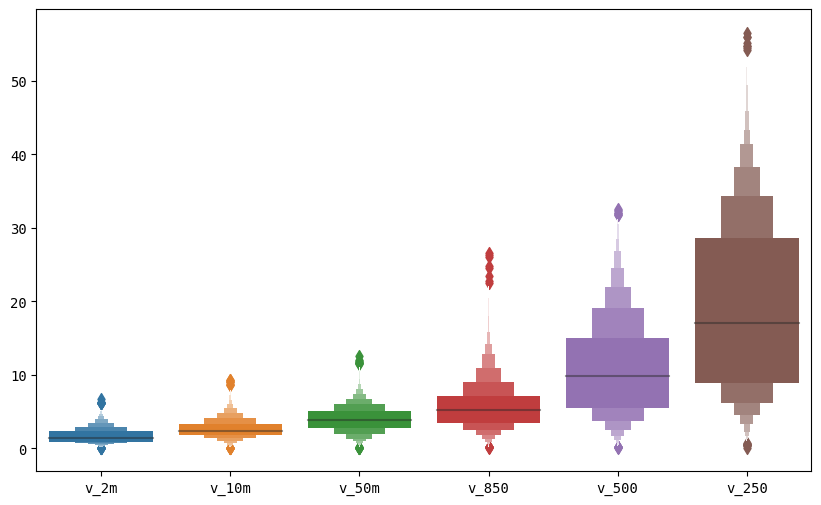

In [58]:
sns.boxenplot(data=df[vs0])

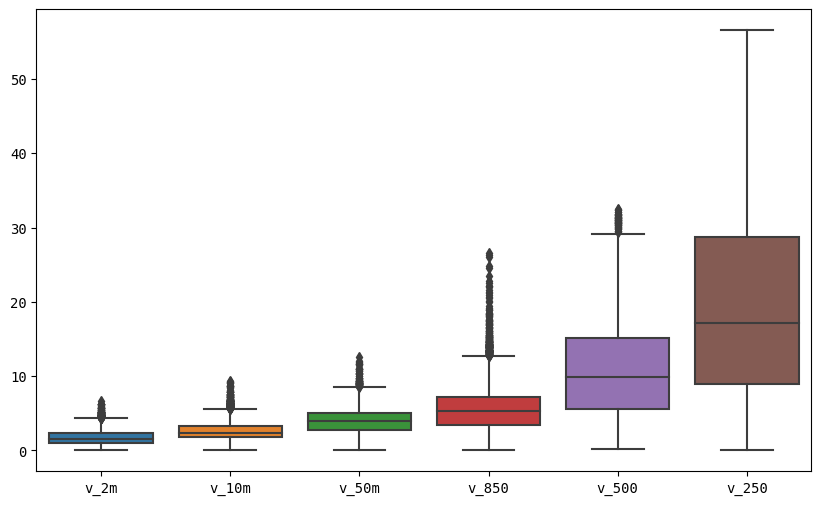

In [59]:
fig, ax = plt.subplots()
sns.boxplot(data=df[vs0], ax=ax)

In [60]:
ds

['d_2m', 'd_10m', 'd_50m', 'd_850', 'd_500', 'd_250', 'pm25']

In [61]:
ds0 = ['d_2m', 'd_10m', 'd_50m', 'd_850', 'd_500', 'd_250']

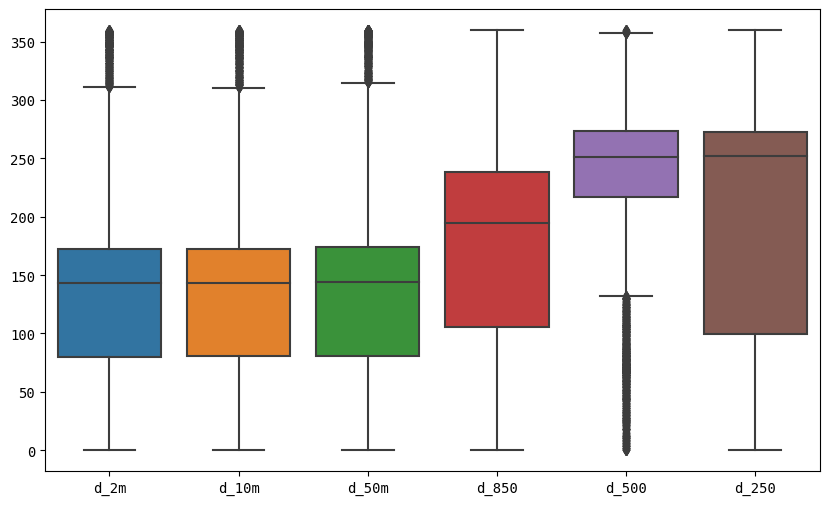

In [62]:
sns.boxplot(data=df[ds0])

- nothing much to comment on

# Convert specific humdity to relative humdity

 The formula used is that from [Bolton1980]_ for T in degrees Celsius:

 $$ 6.112 e^\frac{17.67T}{T + 243.5}$$

In [63]:
# let load the data file from MERRA-2
df = pd.read_csv('data/merra2_slv_hanoi_2018.csv',
                parse_dates=['time'],
                index_col=['time'])
df.head()

,U2M,V250,TROPT,TROPPB,T2M,TQL,T500,U850,PS,V850,...,H850,T850,U50M,U10M,TROPPV,H500,V500,T2MWET,U500,QV10M
time,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,0.023183,10.807207,192.34645,10051.0290,287.10890,0.008423,267.34950,-0.678858,100905.08,6.310610,...,1527.0985,283.53122,0.030755,0.031674,7564.037,5840.2160,-1.304574,284.03730,11.181688,0.007823
2018-01-01 01:00:00,0.189619,11.351880,192.50723,10052.2750,286.79376,0.009235,267.07660,-0.398818,100865.09,6.162886,...,1522.4517,283.64413,0.424628,0.304242,7369.791,5835.2650,-2.038413,283.94345,11.029030,0.007823
2018-01-01 02:00:00,0.243190,11.913273,192.63431,10051.5625,286.48932,0.006260,266.77542,-0.217877,100819.56,5.993750,...,1518.0483,283.75928,0.544786,0.386887,7256.081,5830.6333,-2.332026,283.87656,10.573646,0.007822
2018-01-01 03:00:00,0.195083,12.295908,192.71167,10052.2780,286.24753,0.003489,266.50415,-0.217092,100793.71,5.911840,...,1515.4990,283.86768,0.383533,0.283328,7255.750,5828.6885,-2.251715,283.76090,10.046288,0.007807
2018-01-01 04:00:00,0.132475,12.672207,192.72789,10050.9120,285.96360,0.002314,266.30140,-0.108732,100791.80,5.884082,...,1514.8696,283.87558,0.213028,0.169195,7256.080,5828.3154,-1.790147,283.66614,9.330713,0.007804


In [64]:
df.columns

Index(['U2M', 'V250', 'TROPT', 'TROPPB', 'T2M', 'TQL', 'T500', 'U850', 'PS',
       'V850', 'H250', 'Q250', 'T2MDEW', 'V50M', 'Q500', 'DISPH', 'H1000',
       'TS', 'T10M', 'TROPPT', 'SLP', 'U250', 'Q850', 'ZLCL', 'TQV', 'V2M',
       'T250', 'TROPQ', 'V10M', 'H850', 'T850', 'U50M', 'U10M', 'TROPPV',
       'H500', 'V500', 'T2MWET', 'U500', 'QV10M'],
      dtype='object')

In [65]:
# we will need air temperature and dewpoint temperature
cols = ['T2M', 'T2MDEW']

In [66]:
# standard name
name_

{'U2M': '2-meter_eastward_wind, m s-1',
 'V250': 'northward_wind_at_250_hPa, m s-1',
 'TROPT': 'tropopause_temperature_using_blended_TROPP_estimate, K',
 'TROPPB': 'tropopause_pressure_based_on_blended_estimate, Pa',
 'T2M': '2-meter_air_temperature, K',
 'TQL': 'total_precipitable_liquid_water, kg m-2',
 'T500': 'air_temperature_at_500_hPa, K',
 'U850': 'eastward_wind_at_850_hPa, m s-1',
 'PS': 'surface_pressure, Pa',
 'V850': 'northward_wind_at_850_hPa, m s-1',
 'H250': 'height_at_250_hPa, m',
 'Q250': 'specific_humidity_at_250_hPa, kg kg-1',
 'T2MDEW': 'dew_point_temperature_at_2_m, K',
 'V50M': 'northward_wind_at_50_meters, m s-1',
 'Q500': 'specific_humidity_at_500_hPa, kg kg-1',
 'DISPH': 'zero_plane_displacement_height, m',
 'H1000': 'height_at_1000_mb, m',
 'TS': 'surface_skin_temperature, K',
 'T10M': '10-meter_air_temperature, K',
 'TROPPT': 'tropopause_pressure_based_on_thermal_estimate, Pa',
 'SLP': 'sea_level_pressure, Pa',
 'U250': 'eastward_wind_at_250_hPa, m s-1',
 'Q85

In [67]:
dft = df[cols]

## Approximation

In [68]:
dft.columns

Index(['T2M', 'T2MDEW'], dtype='object')

In [69]:
# this use *C degree, but since but of T2M and T2MDEW in Kelvin degree, we don't have convert
dft['RH_est'] = dft.apply(lambda row: 100-5*(row['T2M']-row['T2MDEW']), axis=1)
dft.head()

,T2M,T2MDEW,RH_est
time,,,
2018-01-01 00:00:00,287.10890,284.03317,84.62135
2018-01-01 01:00:00,286.79376,283.94443,85.75335
2018-01-01 02:00:00,286.48932,283.87836,86.94520
2018-01-01 03:00:00,286.24753,283.75630,87.54385
2018-01-01 04:00:00,285.96360,283.65967,88.48035


## Use MetPy package

ref https://unidata.github.io/MetPy/latest/api/generated/metpy.calc.relative_humidity_from_dewpoint.html#metpy.calc.relative_humidity_from_dewpoint

In [70]:
# inline method not work
dft['RH_mp'] = dft.apply(lambda row: mpcalc.relative_humidity_from_dewpoint(row['T2M']*units.K, row['T2MDEW']*units.K).magnitude*100, axis=1)

In [71]:
dft.head()

,T2M,T2MDEW,RH_est,RH_mp
time,,,,
2018-01-01 00:00:00,287.10890,284.03317,84.62135,81.704321
2018-01-01 01:00:00,286.79376,283.94443,85.75335,82.904195
2018-01-01 02:00:00,286.48932,283.87836,86.94520,84.193856
2018-01-01 03:00:00,286.24753,283.75630,87.54385,84.840914
2018-01-01 04:00:00,285.96360,283.65967,88.48035,85.876586


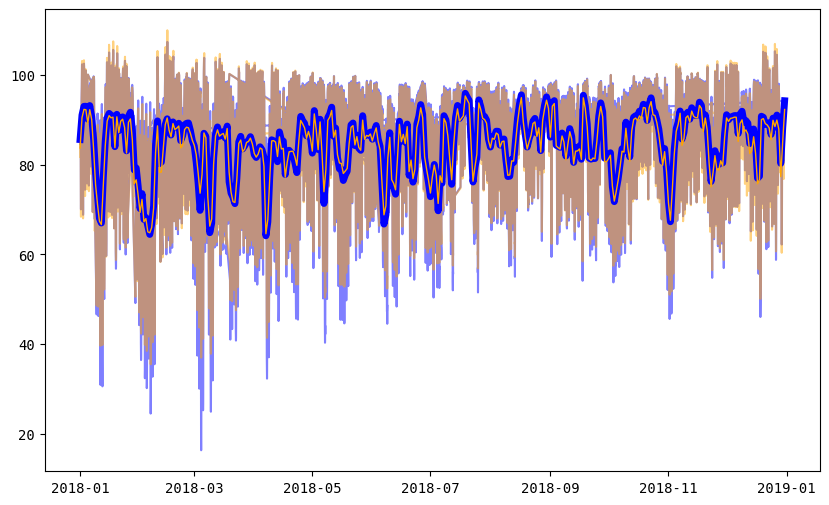

In [72]:
plt.plot(dft.index, dft['RH_est'], color='blue', alpha=0.5)
plt.plot(dft.index, dft['RH_mp'], color='orange', alpha=0.5)
dftd = dft.resample('1D').mean()
plt.plot(dftd.index, dftd['RH_est'], color='blue', lw=5)
plt.plot(dftd.index, dftd['RH_mp'], color='orange', lw=1)


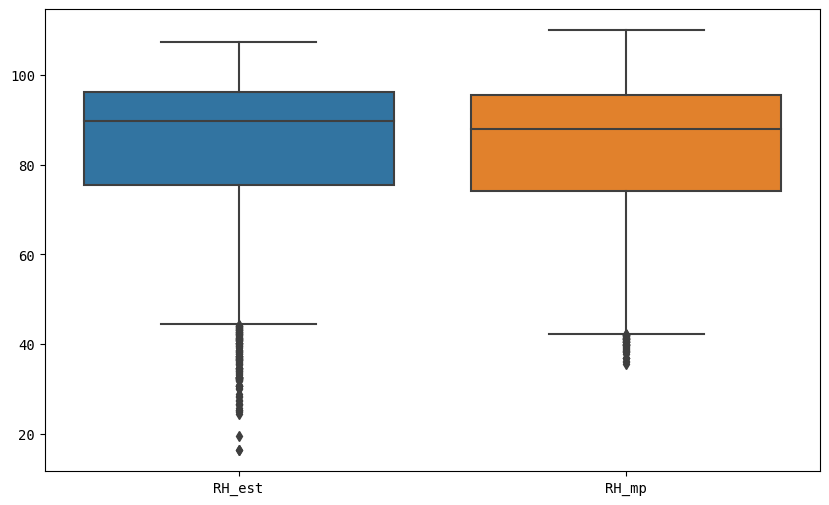

In [73]:
sns.boxplot(data=dft[['RH_est', 'RH_mp']])

- they are quite similar, so either go with more accurate method (MetPy) or quick and simple (approxiation)

# Darksky (forecast and historical API) vs. observed data (Noiba via NOAA)

## DarkSky

In [74]:
import datetime

In [75]:
dk = pd.read_csv('data/darksky_hanoi_2018.csv',
                parse_dates=['time'],
                index_col=['time'])

In [76]:
dk.head()

,apparenttemperature,cloudcover,dewpoint,humidity,icon,ozone,precipintensity,precipprobability,preciptype,pressure,summary,temperature,uvindex,visibility,windbearing,windgust,windspeed
time,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00,16.98,NaN,10.99,0.68,clear-night,NaN,0.0,0.0,NaN,NaN,Clear,16.98,0.0,10.01,11.0,NaN,4.60
2017-12-31 01:00:00,16.97,1.0,10.47,0.66,cloudy,NaN,0.0,0.0,NaN,1023.82,Overcast,16.97,0.0,10.01,9.0,NaN,3.20
2017-12-31 02:00:00,16.98,NaN,9.99,0.63,clear-night,NaN,0.0,0.0,NaN,NaN,Clear,16.98,0.0,10.01,11.0,NaN,4.10
2017-12-31 03:00:00,16.98,NaN,9.99,0.63,clear-night,NaN,0.0,0.0,NaN,NaN,Clear,16.98,0.0,10.01,11.0,NaN,3.60
2017-12-31 04:00:00,16.79,1.0,10.41,0.66,cloudy,NaN,0.0,0.0,NaN,1023.19,Overcast,16.79,0.0,10.01,0.0,NaN,3.04


In [77]:
# dk['time'] = dk['utctime'].apply(dt.fromtimestamp)
# dk.to_csv('data/darksky_hanoi_2018.csv')

In [78]:
import matplotlib as mpl

In [79]:
# plt.style.use('seaborn-paper')

In [80]:
df.sort_index(inplace=True)

In [81]:
df['T2M_C'] = df['T2M'] - 273.15

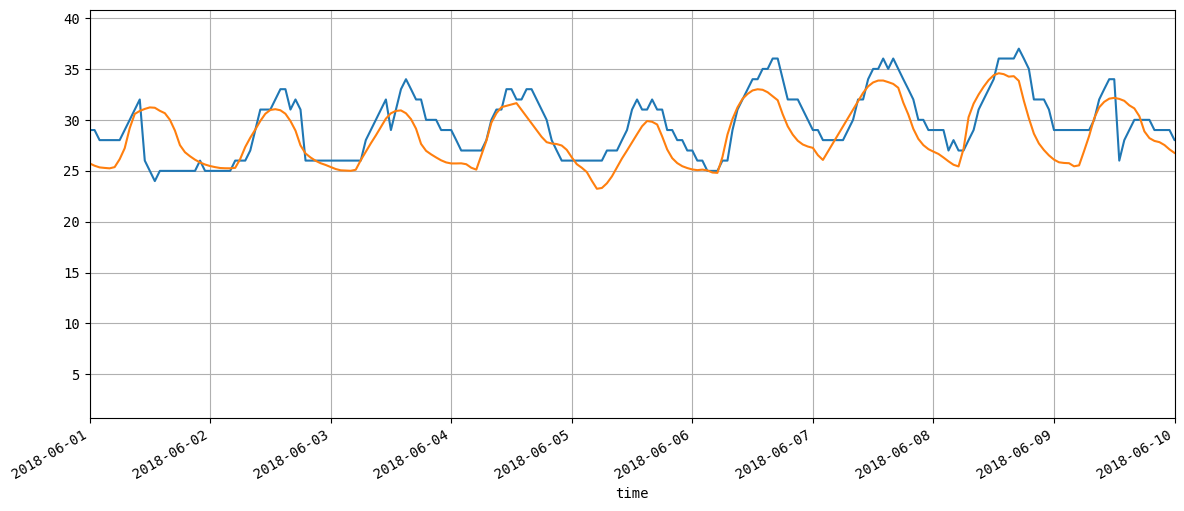

In [82]:
fig, ax = plt.subplots(figsize=[14,6])
dk['temperature'].plot(ax=ax)
ax.plot(df.index, df['T2M_C'])
# ax.xaxis.set_major_locator(mpl.dates.DayLocator())
ax.xaxis.set_minor_locator(mpl.dates.AutoDateLocator())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
# ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h\n%Y'))
ax.set_xlim(datetime.datetime(2018,6,1), datetime.datetime(2018,6,10))
plt.grid(which='both', axis='both')

In [83]:
dk.columns

Index(['apparenttemperature', 'cloudcover', 'dewpoint', 'humidity', 'icon',
       'ozone', 'precipintensity', 'precipprobability', 'preciptype',
       'pressure', 'summary', 'temperature', 'uvindex', 'visibility',
       'windbearing', 'windgust', 'windspeed'],
      dtype='object')

In [84]:
dft.sort_index(inplace=True)

In [85]:
dk.humidity = dk.humidity*100

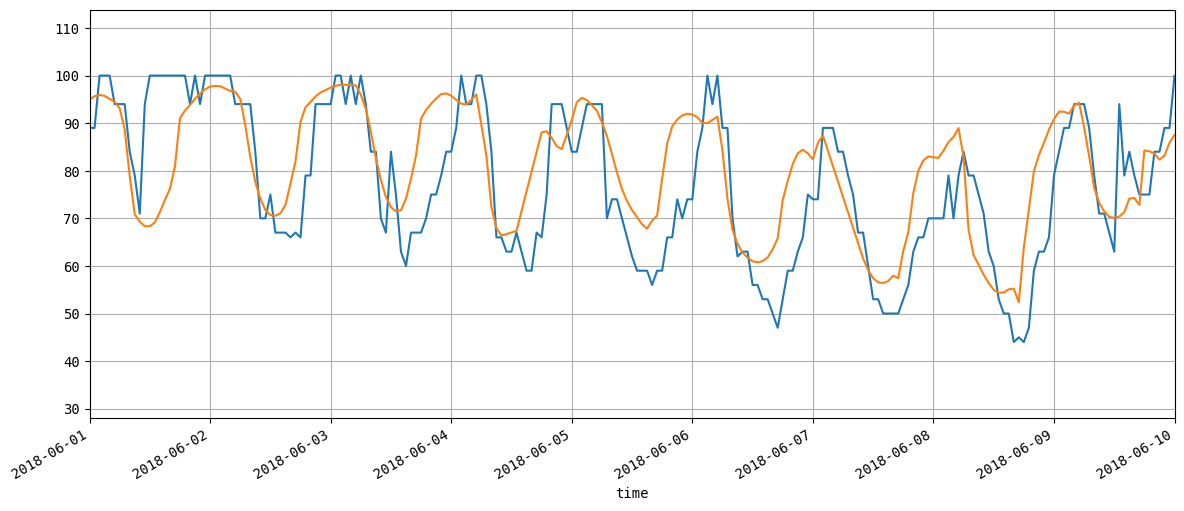

In [86]:
fig, ax = plt.subplots(figsize=[14,6])
dk['humidity'].plot(ax=ax)
ax.plot(dft.index, dft['RH_mp'])
# ax.xaxis.set_major_locator(mpl.dates.DayLocator())
ax.xaxis.set_minor_locator(mpl.dates.AutoDateLocator())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));
# ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('%h\n%Y'))
ax.set_xlim(datetime.datetime(2018,6,1), datetime.datetime(2018,6,10))
plt.grid(which='both', axis='both')

## Noibai meteorological data 

In [87]:
nb = pd.read_csv('data/cleaned_noibai_noaa_isd_2018.csv',
                parse_dates=['DATE'],
                index_col=['DATE'])

In [88]:
nb.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT
DATE,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60,2.1,0.7,975.0
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80,3.1,0.4,762.0


In [89]:
nb['RH_mp'] = nb.apply(lambda row: mpcalc.relative_humidity_from_dewpoint(
    (row['TMP']+273.15)*units.K, (row['DEW']+273.15)*units.K).magnitude*100, axis=1)

In [90]:
nb.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,RH_mp
DATE,,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0,77.137733
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0,77.137733
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0,77.137733
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60,2.1,0.7,975.0,72.380993
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80,3.1,0.4,762.0,72.380993


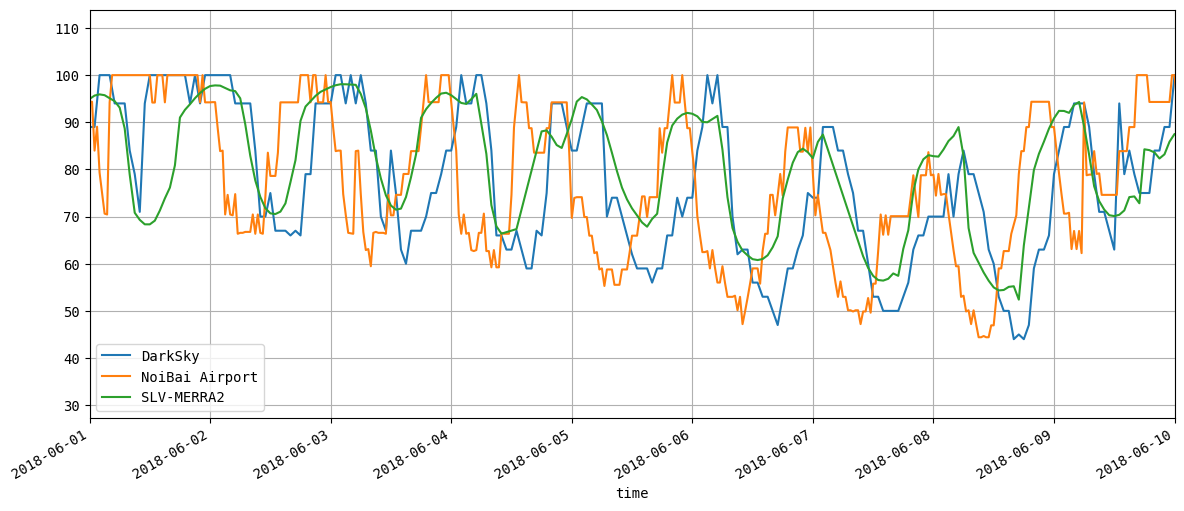

In [91]:
fig, ax = plt.subplots(figsize=[14,6])
dk['humidity'].plot(ax=ax, label='DarkSky')
ax.plot(nb.index, nb['RH_mp'], label='NoiBai Airport')
ax.plot(dft.index, dft['RH_mp'], label='SLV-MERRA2')
ax.set_xlim(datetime.datetime(2018,6,1), datetime.datetime(2018,6,10))
plt.grid(which='both', axis='both')
plt.legend()

- the data from  Darksky and from NOAA not quite match, they are about 7 hours different by the pitches
- let add 7 hours to the Noibai set and that the timezone different between UTC time (GMT+0), and local time (GMT+&)

In [92]:
dft.columns

Index(['T2M', 'T2MDEW', 'RH_est', 'RH_mp'], dtype='object')

In [93]:
dft['T2M_C'] = dft['T2M'] - 273.15

In [94]:
nb.head()

,CIG,VIS,TMP,DEW,WD,WS,CLDCR,CLDHT,RH_mp
DATE,,,,,,,,,
2018-01-01 00:00:00,1067.0,8000,16.0,12.0,80,1.5,0.7,1067.0,77.137733
2018-01-01 00:30:00,975.0,8000,16.0,12.0,60,1.5,0.7,975.0,77.137733
2018-01-01 01:00:00,975.0,7000,16.0,12.0,80,1.5,0.7,975.0,77.137733
2018-01-01 01:30:00,975.0,7000,17.0,12.0,60,2.1,0.7,975.0,72.380993
2018-01-01 02:00:00,1006.0,7000,17.0,12.0,80,3.1,0.4,762.0,72.380993


In [95]:
nb.index = nb.index + datetime.timedelta(hours=7)

In [97]:
import random

In [98]:
random.randint(1, 355)

3

In [99]:
ylabels = [item.get_text() for item in ax.get_xticklabels()]
ylabels

['2018-06-01',
 '2018-06-02',
 '2018-06-03',
 '2018-06-04',
 '2018-06-05',
 '2018-06-06',
 '2018-06-07',
 '2018-06-08',
 '2018-06-09',
 '2018-06-10']

In [100]:
def select_peridod(df=None, start=None, days=10):
    end = start+datetime.timedelta(days=days)
    return df[(df.index >=start) & (df.index <= end)]

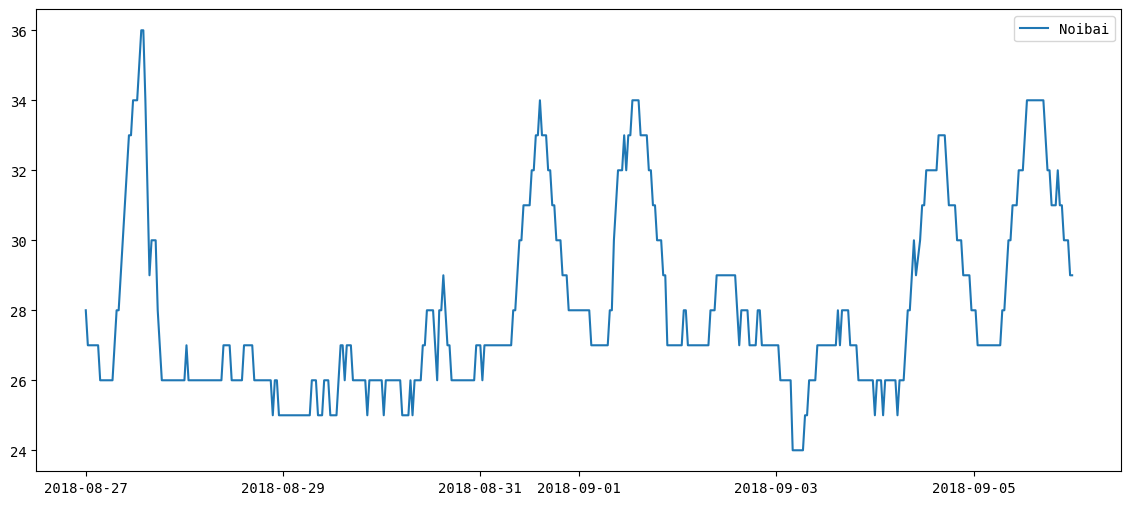

In [102]:
days=10
start = datetime.datetime(2018, 1, 1) + datetime.timedelta(random.randint(1, 365-days))

fig, ax = plt.subplots(figsize=[14,6])
nbt = select_peridod(df=nb, start=start, days=days)
ax.plot(nbt.index, nbt['TMP'], label='Noibai')
plt.legend();

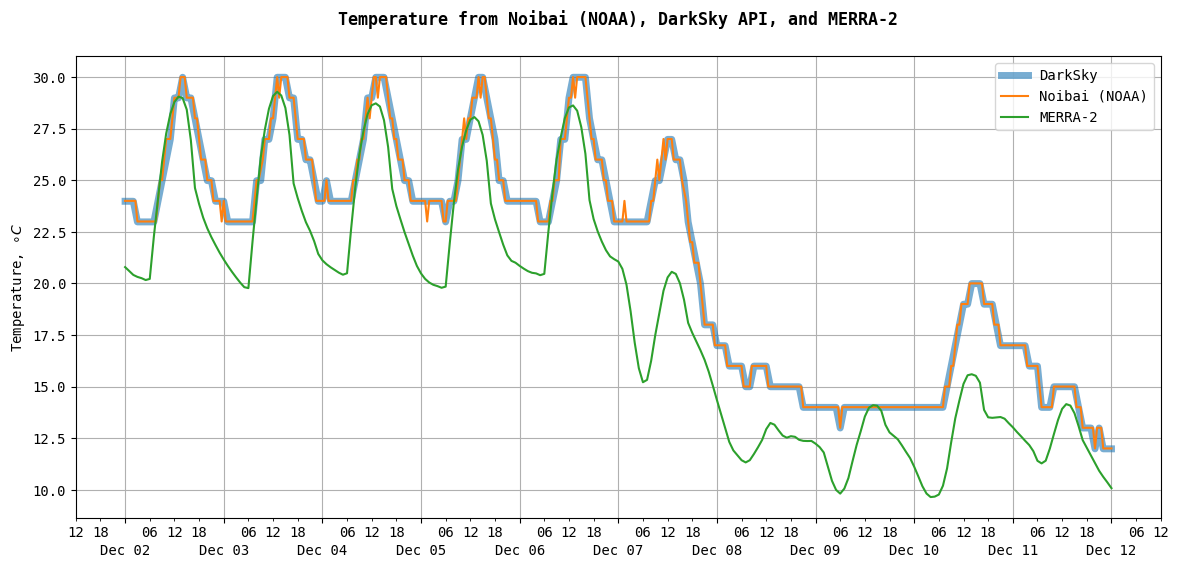

In [113]:
days=10
start = datetime.datetime(2018, 1, 1) + datetime.timedelta(random.randint(1, 365-days))

fig, ax = plt.subplots(figsize=[14,6])

dkt = select_peridod(df=dk, start=start, days=days)
ax.plot(dkt.index, dkt.temperature, label='DarkSky', lw=5, alpha=0.6)

nbt = select_peridod(df=nb, start=start, days=days)
ax.plot(nbt.index, nbt['TMP'], label='Noibai (NOAA)', lw=1.5)

mrt = select_peridod(df=dft, start=start, days=days)
ax.plot(mrt.index, mrt['T2M_C'], label='MERRA-2')



ax.xaxis.set_major_locator(mpl.dates.DayLocator())
ax.xaxis.set_minor_locator(mpl.dates.HourLocator(interval=6))
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%H'))
ax.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n%b %d'))

ax.set_ylabel('Temperature, $\circ C$')
ax.set_title('Temperature from Noibai (NOAA), DarkSky API, and MERRA-2', y=1.05, weight='bold')

plt.grid(axis='both')
plt.legend();
plt.savefig('img/2020Aug-Temp-sources.png', optimize=True)

# explore 

In [114]:
dk.head()

,apparenttemperature,cloudcover,dewpoint,humidity,icon,ozone,precipintensity,precipprobability,preciptype,pressure,summary,temperature,uvindex,visibility,windbearing,windgust,windspeed
time,,,,,,,,,,,,,,,,,
2017-12-31 00:00:00,16.98,NaN,10.99,68.0,clear-night,NaN,0.0,0.0,NaN,NaN,Clear,16.98,0.0,10.01,11.0,NaN,4.60
2017-12-31 01:00:00,16.97,1.0,10.47,66.0,cloudy,NaN,0.0,0.0,NaN,1023.82,Overcast,16.97,0.0,10.01,9.0,NaN,3.20
2017-12-31 02:00:00,16.98,NaN,9.99,63.0,clear-night,NaN,0.0,0.0,NaN,NaN,Clear,16.98,0.0,10.01,11.0,NaN,4.10
2017-12-31 03:00:00,16.98,NaN,9.99,63.0,clear-night,NaN,0.0,0.0,NaN,NaN,Clear,16.98,0.0,10.01,11.0,NaN,3.60
2017-12-31 04:00:00,16.79,1.0,10.41,66.0,cloudy,NaN,0.0,0.0,NaN,1023.19,Overcast,16.79,0.0,10.01,0.0,NaN,3.04


In [115]:
dk.dtypes

apparenttemperature    float64
cloudcover             float64
dewpoint               float64
humidity               float64
icon                    object
ozone                  float64
precipintensity        float64
precipprobability      float64
preciptype              object
pressure               float64
summary                 object
temperature            float64
uvindex                float64
visibility             float64
windbearing            float64
windgust               float64
windspeed              float64
dtype: object

In [116]:
dk.columns

Index(['apparenttemperature', 'cloudcover', 'dewpoint', 'humidity', 'icon',
       'ozone', 'precipintensity', 'precipprobability', 'preciptype',
       'pressure', 'summary', 'temperature', 'uvindex', 'visibility',
       'windbearing', 'windgust', 'windspeed'],
      dtype='object')

In [117]:
cols = ['cloudcover', 'dewpoint', 'humidity', 'precipintensity', 'pressure', 'temperature', 'visibility', 'windbearing', 'windspeed']

In [118]:
del dkt
dkt = dk[cols]

In [119]:
dkt.tail()

,cloudcover,dewpoint,humidity,precipintensity,pressure,temperature,visibility,windbearing,windspeed
time,,,,,,,,,
2018-12-31 20:00:00,NaN,5.0,58.0,NaN,NaN,12.99,10.01,60.0,2.1
2018-12-31 21:00:00,NaN,6.0,67.0,NaN,NaN,11.98,10.01,80.0,1.5
2018-12-31 22:00:00,NaN,5.0,62.0,NaN,NaN,11.98,10.01,60.0,2.6
2018-12-31 23:00:00,NaN,6.0,67.0,NaN,NaN,11.98,10.01,60.0,1.5
2019-01-01 00:00:00,NaN,6.0,67.0,NaN,NaN,11.98,10.01,50.0,2.1


In [120]:
dkt = pd.merge(pm25, dkt, right_index=True, left_index=True)

In [121]:
dkt.head()

,pm25,cloudcover,dewpoint,humidity,precipintensity,pressure,temperature,visibility,windbearing,windspeed
2018-01-01 01:00:00,69.2,0.82,13.24,81.0,0.0,1019.69,16.44,9.0,330.0,1.5
2018-01-01 02:00:00,75.5,0.75,10.99,72.0,0.0,NaN,15.99,9.0,90.0,1.5
2018-01-01 03:00:00,90.2,0.75,11.99,77.0,0.0,NaN,15.99,8.0,80.0,1.5
2018-01-01 04:00:00,97.6,0.00,12.48,86.0,0.0,1018.30,14.73,8.0,71.0,1.5
2018-01-01 05:00:00,89.1,0.00,10.99,77.0,0.0,NaN,14.99,8.0,71.0,1.0


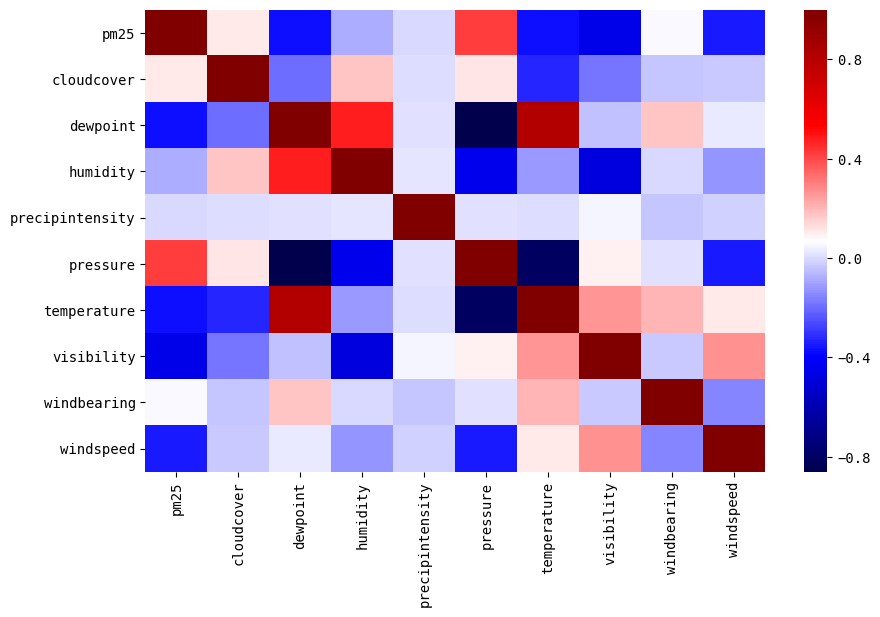

In [122]:
sns.heatmap(dkt.corr(), cmap='seismic')

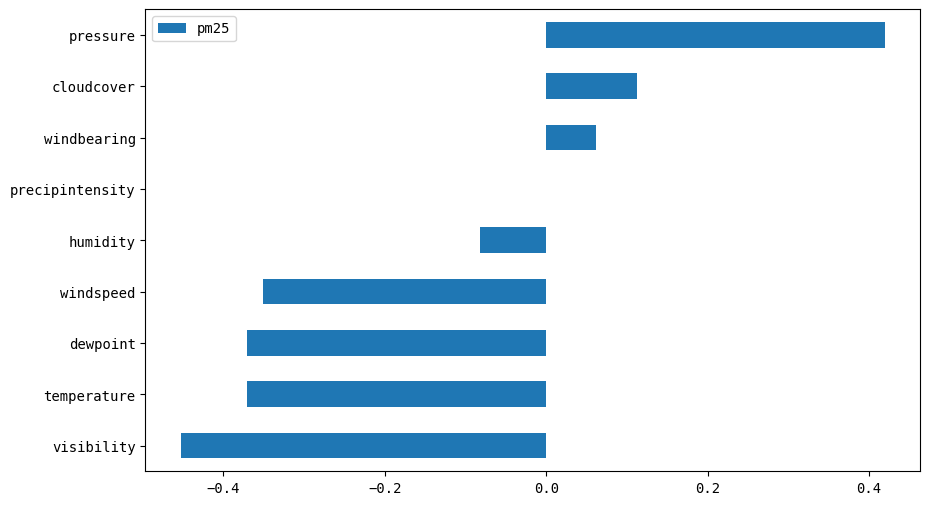

In [123]:
dkt.corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh()

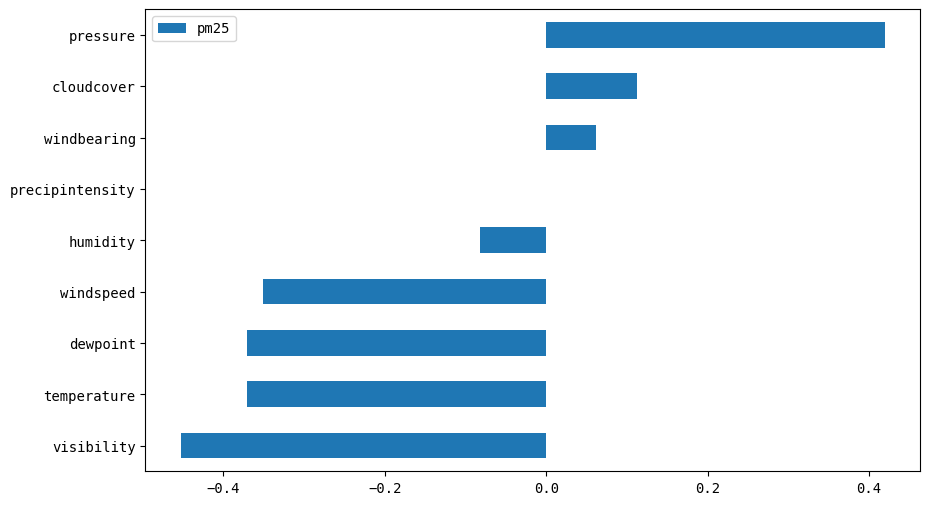

In [124]:
dkt.corr()['pm25'].sort_values().to_frame().drop('pm25').plot.barh()

In [125]:
dkt.count()

pm25               8153
cloudcover         6441
dewpoint           8150
humidity           8150
precipintensity    3220
pressure           1079
temperature        8150
visibility         8119
windbearing        7939
windspeed          8020
dtype: int64

- interesting enough, the relative humidity is in very weak correlation with PM<sub>2.5</sub>
- the data from DarkSky API was basic in 2018, and the missing data of pressure shows

In [126]:
df['H500'].mean()

5853.869860132034

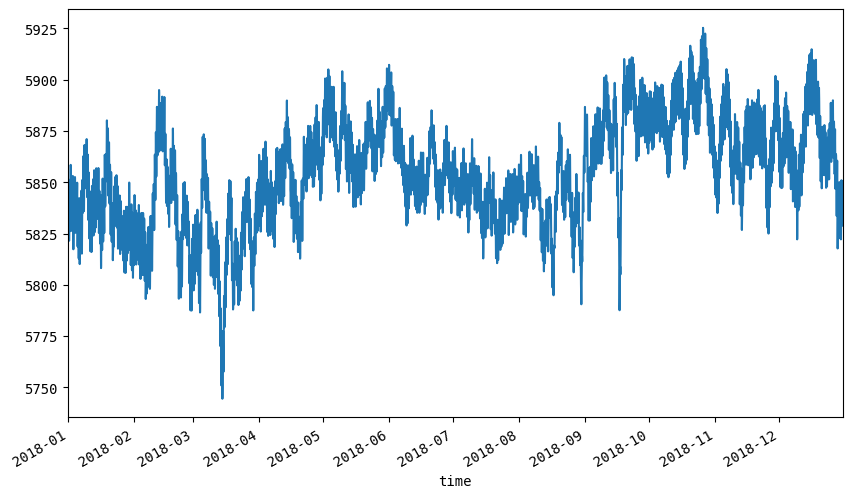

In [127]:
df['H500'].plot()

In [128]:
df.columns

Index(['U2M', 'V250', 'TROPT', 'TROPPB', 'T2M', 'TQL', 'T500', 'U850', 'PS',
       'V850', 'H250', 'Q250', 'T2MDEW', 'V50M', 'Q500', 'DISPH', 'H1000',
       'TS', 'T10M', 'TROPPT', 'SLP', 'U250', 'Q850', 'ZLCL', 'TQV', 'V2M',
       'T250', 'TROPQ', 'V10M', 'H850', 'T850', 'U50M', 'U10M', 'TROPPV',
       'H500', 'V500', 'T2MWET', 'U500', 'QV10M', 'T2M_C'],
      dtype='object')

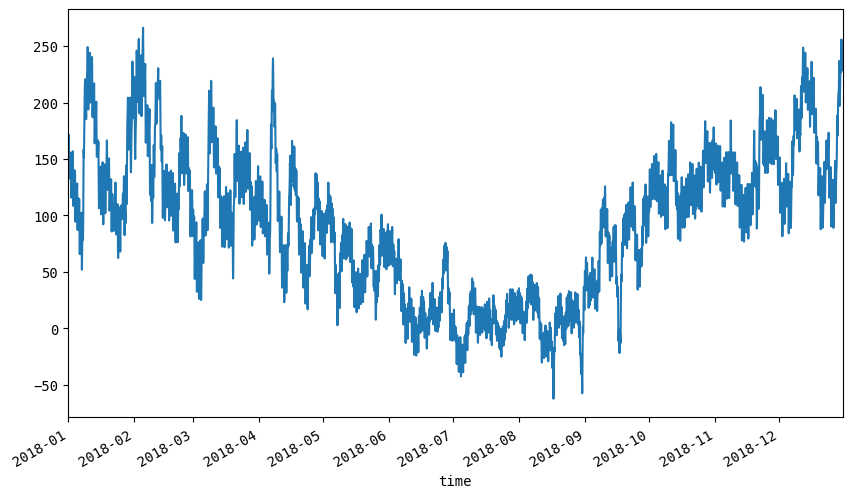

In [129]:
df['H1000'].plot()

- interesting, during the summer (in which the ground temperature is higher), a thinkness of 1000hPa pressure is much lower than in the winter. Why is this important for PM<sub>2.5</sub> because PM<sub>2.5</sub> concentration during hot months is lower than in colder months

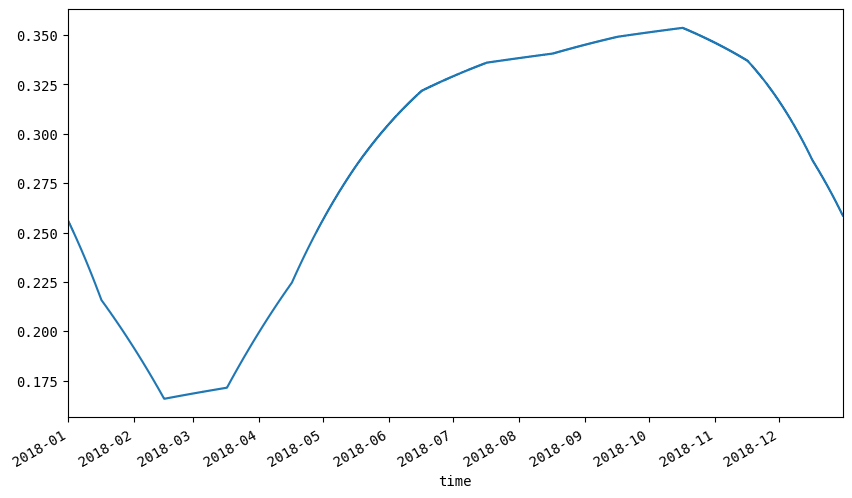

In [130]:
df['DISPH'].plot()

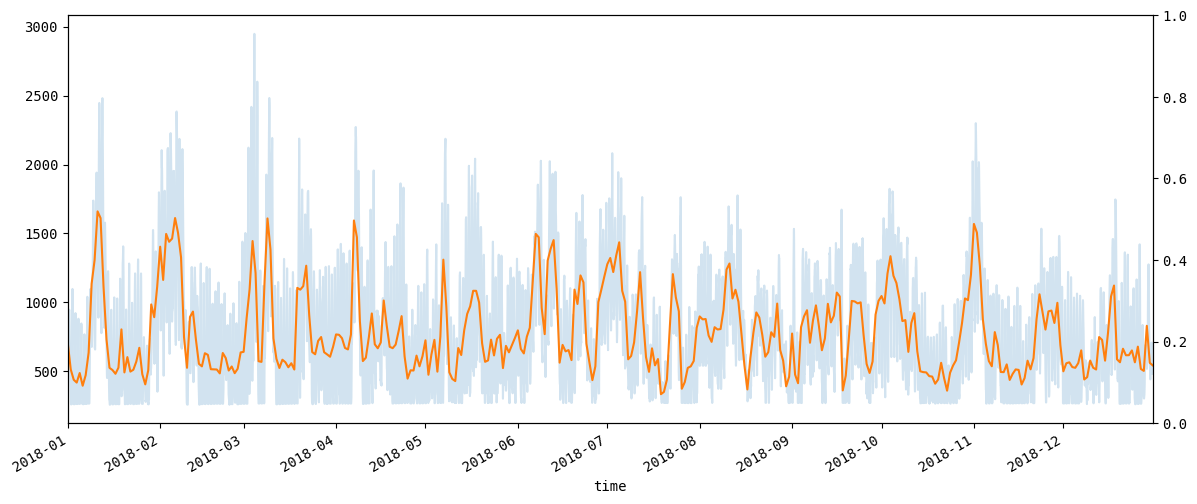

In [131]:
fig, ax = plt.subplots(figsize=[14,6])
df['ZLCL'].plot(ax=ax, alpha=0.2)
df['ZLCL'].resample('1D').mean().plot(ax=ax)
ax2 = ax.twinx()
# pm25[['pm25']].resample('1D').mean().plot(ax=ax2, color='red')
# dft = pm25[['pm25']].resample('1D').mean()
# ax2.plot(dft, color='red')

# select important columns to be included in a final df for ML

- the limitation of forecast data, or any data we know in advance that influence PM<sub>2.5</sub> is a key obstacle
- all the parameters we have looked at so far is in weak or at best low-moderate correlation with PM<sub>2.5</sub>. That emphasis the nature of PM<sub>2.5</sub> as a mixed-bag collector of pollutants in the ground atmosphere. In addition, since I forgone the emission sources and formation pathway, in a plain language, we are guessing what we can guess.
- as the interest of forecast PM<sub>2.5</sub>, we can try two approaches:
    1. Comb all relevant parameters from MERRA-2, observed data (NOAA), Open Forecast weather (Darksky), to make a comprehensive set of data. From this exercise, the observed data archieved in NCEI (NOAA) surfice the need to get data from forecast API. This is helpful to diagnosis the past events and understand what might have been the causess
    2. Select only available forecast data. This approach is simplistic but practical to building some forecast for PM<sub>2.5</sub>